# Proyek Analisis Data:

*   Nama : Muchammad Taufik
*   Email : muchammadtaufik.22010@mhs.unesa.ac.id
*   ID Dicoding : muchammad_taufik


## Menentukan Pertanyaan Bisnis

1. Apakah harga(price) dan biaya pengiriman(freight value) saling mempengaruhi?
2. Bagaimana jika salah satu variabel tersebut mengalami kenaikan?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [ ]:
#Membaca dataset dan menampilkannya
df = read_csv("/content/olist_order_items_dataset.csv")
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight:**
Data yang akan saya menggunakan adalah data order items. Diatas saya melakukan pembacaan data dan menampilkannya.



### Assessing Data

In [ ]:
#Manampilkan informasi dari dataset yang telah dibaca
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
Tahap ini dilakukan untuk melihat informasi dari data set yang telah dibaca.  Selain itu kita bisa melihat type data dari tiap kolom.

In [ ]:
#Mengecek missing value
df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
Melakukan pengecekan untuk memastikan apakah ada missing value dari dataset

In [ ]:
#Memeriksa duplikasi data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:** Melakukan pengecekan apakah ada duplikasi data pada dataset

In [ ]:
#Memeriksa parameter statistik
df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam dataset. Dengan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada dataset.

### Cleaning Data

Karena pada assessing data tidak ditemukan missing value, duplikasi data, dan inacurrate data. Maka saya tidak melakukan cleaning data dan langsung dilanjutkan untuk mengambil kolom yang akan diolah.

In [ ]:
#Membuat data training
x_train = df[['price', 'freight_value']]
x_train

,price,freight_value
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14
...,...,...
112645,299.99,43.41
112646,350.00,36.53
112647,99.90,16.95
112648,55.99,8.72


**Insight:**
Mengambil 2 kolom yang akan diolah yaitu kolom price dan freight value

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Memeriksa parameter statistik
df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
Berdasarkan hasil tersebut diketahui bahwa rata-rata biaya pengiriman(freight value) 19,99. Biaya pengiriman maksimum 409,68 dan biaya pengiriman minimum 0

array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'freight_value'}>, <Axes: >]],
      dtype=object)

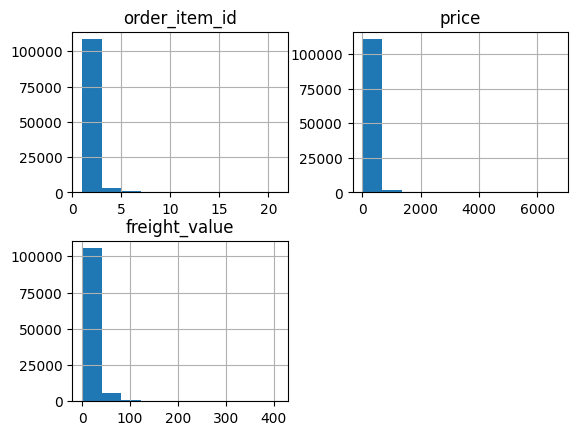

In [ ]:
#Mevisualkan data dengan histogram
df.hist()

**Insight :** Dari histogram kita bisa ketahui bahwa kolom order item, price, dan fright value memiliki distribusi right-skewed.

In [ ]:
x_train.corr()

,price,freight_value
price,1.000000,0.414204
freight_value,0.414204,1.000000


**Insight :** Dari hasil korelasi 0,4142, dapat disimpulkan bahwa price dan freight value memiliki korelasi yang cukup dan hubungan kedua variabel searah(positif).

## Visualization & Explanatory Analysis

Pada bagian visualisasi saya akan menggunakan metode K-Means Clustering untuk mencari pembagian kluster dari dua variabel yaitu price dan freight value.

In [ ]:
#Melakukan feature scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

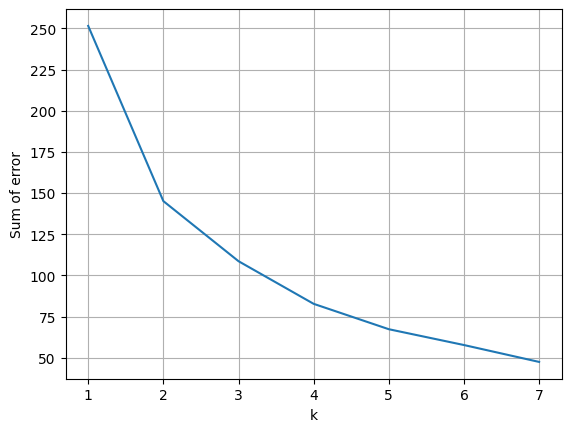

In [ ]:
#Mencari k (jumlah Cluster) terbaik
inertias = []
k_range = range(1,8)
for k in k_range:
  km = KMeans(n_clusters=k).fit(x_train)
  inertias.append(km.inertia_)
plt.xlabel("k")
plt.ylabel("Sum of error")
plt.plot(k_range,inertias)
plt.grid()

Metode Elbow digunakan untuk mencari jumlah cluster yang paling baik. Dengan meihat grafik yang ada, semakin tajam grafik tersebut maka jumlah kluster tersebut memiliki data outlier semakin rendah. Pada kasus ini grafik menunjukkan penurunan tajam pada k=2 dan k=4. Saya memilih menggunakan k=2 karena pelabelan kluster pada k=4 tidak memungkinkan pada kasus ini.

In [ ]:
#Membuat clustering
kmean = KMeans(n_clusters=2)
y_cluster = kmean.fit_predict(x_train)

In [ ]:
#Mencari centroid
kmean.cluster_centers_

array([[0.06757327, 0.1560888 ],
       [0.01443168, 0.04155596]])

Mencari centroid berguna untuk kita mengetahui kluster mana yang harus kita labelkan dengan "keuntungan tinggi" dan "keuntungan rendah"

<ipython-input-15-a5fe1180fe60>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0')
<ipython-input-15-a5fe1180fe60>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1')


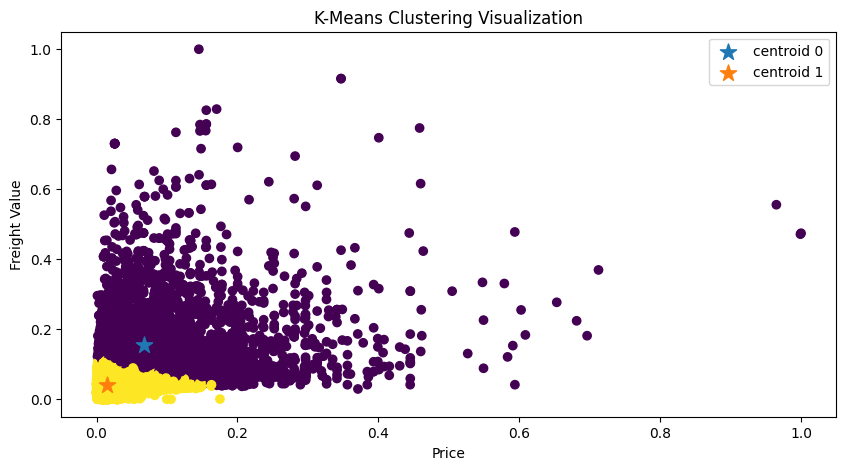

In [ ]:
#visualisasi data hasil clustering dengan centroid
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0], x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0')
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.legend()

In [ ]:
#Menambahkan kolom baru dengan nama cluster pada dataset
df['Cluster'] = y_cluster
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1


In [ ]:
#Merubah indeks clustering menjadi keuntungan tinggi dan keuntungan rendah
df['Cluster'] = df['Cluster'].replace([0,1],['keuntungan tinggi','keuntungan rendah'])
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,keuntungan rendah
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,keuntungan rendah
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,keuntungan rendah
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,keuntungan rendah
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,keuntungan rendah
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,keuntungan tinggi
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,keuntungan rendah
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,keuntungan rendah
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,keuntungan rendah


In [ ]:
#Mengetahui Jumlah Data Tiap Cluster
jumlah_data_cluster = df['Cluster'].value_counts()
print("Jumlah data untuk setiap jenis cluster:")
print(jumlah_data_cluster)

Jumlah data untuk setiap jenis cluster:
Cluster
keuntungan rendah    105537
keuntungan tinggi      7113
Name: count, dtype: int64


In [ ]:
# Membuat DataFrame
data = pd.DataFrame(df)
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,keuntungan rendah
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,keuntungan rendah
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,keuntungan rendah
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,keuntungan rendah
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,keuntungan rendah
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,keuntungan tinggi
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,keuntungan rendah
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,keuntungan rendah
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,keuntungan rendah


In [ ]:
data.to_csv('output.csv')

**Pertanyaan 1**
Dari hasil korelasi dapat disimpulkan price dan freight value cukup saling berpengaruh.

**Pertanyaan 2**
Karena hasil korelasi menunjukkan searah atau positif. Jadi ketika salah satu variabel mengalami kenaikan maka variabel lain juga akan ikut naik.

## Conclusion

Dari hasil klusterisasi diketahui bahwa kluster nol adalah kumpulan data keuntungan tinggi dan kluster satu adalah kumpulan data keuntungan rendah. Untuk hasil eksplorasi data diketahui bahwa price dan freight value cukup saling berpengaruh dan menunjukkan searah atau positif. Jadi ketika salah satu variabel mengalami kenaikan maka variabel lain juga akan ikut naik.